## Introductie

Met behulp van visualisaties ga ik de volgende onderzoeksvragen beantwoorden over de airbnb listings in Amsterdam:

1. Heeft de locatie/wijk waarin een airbnb zich bevindt invloed heeft op de prijs?

2. Is er een correlatie tussen de prijs en het aantal reviews van een airbnb?

Deze informatie kan handig zijn voor iemand die overweegt een airbnb te huren in Amsterdam, en op zoek is naar een redelijke prijs.

### Aanpak

Eerst ga ik kijken naar alle kolommen die mogelijk relevant zijn voor het onderzoek. Ik ga kijken of deze kolommen waarden missen en/of uitschieters hebben. Als een relevante kolom veel missende waarden heeft zal ik hier een oplossing voor bedenken en toepassen. Als een relevante kolom (extreme) uitschieters bevat zal ik deze uit de dataset droppen.

## Data-exploratie

Eerst laad ik de dataset in, en selecteer ik de kolommen die aangeraden zijn in de les. Ik kijk naar hoe de data eruit ziet, en kies de kolommen die ik nodig denk te hebben voor mijn onderzoek.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)

In [82]:
airbnb = pd.read_csv("../databronnen/listings.csv.gz")

selectie_kolommen = ['id', 'listing_url', 'name',
       'description', 'host_id',
       'host_name', 'host_since', 
       'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed','latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights',  'has_availability',
       'availability_30', 'number_of_reviews',
       'number_of_reviews_ltm', 
       'review_scores_rating', 'license']

airbnb = airbnb[selectie_kolommen]

airbnb.head()

,id,listing_url,name,description,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,review_scores_rating,license
0,27886,https://www.airbnb.com/rooms/27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,t,1.0,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,t,0,302,28,4.92,0363 974D 4986 7411 88D8
1,28871,https://www.airbnb.com/rooms/28871,Comfortable double room,Basic bedroom in the center of Amsterdam.,124245,Edwin,2010-05-13,t,2.0,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,t,1,710,93,4.88,0363 607B EA74 0BD8 2F6F
2,29051,https://www.airbnb.com/rooms/29051,Comfortable single / double room,This room can also be rented as a single or a ...,124245,Edwin,2010-05-13,t,2.0,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36584,4.89111,Private room in condo,Private room,2,1.0,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$70.00,2,730,t,0,822,86,4.81,0363 607B EA74 0BD8 2F6F
3,44391,https://www.airbnb.com/rooms/44391,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,194779,Jan,2010-08-08,f,1.0,t,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,52.37168,4.91471,Entire rental unit,Entire home/apt,4,NaN,2.0,NaN,"[""Shampoo"", ""Essentials"", ""Dishwasher"", ""Paid ...",NaN,3,730,t,0,42,0,4.71,0363 E76E F06A C1DD 172C
4,47061,https://www.airbnb.com/rooms/47061,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",211696,Ivar,2010-08-24,f,1.0,t,NaN,De Baarsjes - Oud-West,52.36786,4.87458,Entire rental unit,Entire home/apt,3,1.5,2.0,2.0,"[""Shampoo"", ""Paid street parking off premises""...",$120.00,2,20,t,1,203,5,4.77,0363 1266 8C04 4133 E6AC


Ik benoem de meest interessante kolommen die nuttig kunnen zijn voor het onderzoek:  
- **neighbourhood**  
Dit is de locatie van de airbnb. Deze kolom is niet heel precies, omdat deze alleen de stad aangeeft. Omdat we een dataset gebruiken die alleen over airbnb's in Amsterdam gaat, hebben we weinig aan deze informatie.
- **neighbourhood_cleansed**  
Dit is de wijk waarin de airbnb zich bevindt. Deze kolom is een stuk preciezer dan de neighbourhood kolom, en kan dus gebruikt worden voor het onderzoek.
- **price**  
De prijs per nacht voor de airbnb. Deze informatie is nodig voor beide onderzoeken.
- **number_of_reviews**  
Het totaal aantal reviews voor de airbnb. Nodig voor het 2e onderzoek.

### Missende waarden en datatypen

Met behulp van .info() kijk in naar het aantal missende waarden per kolom, en de datatypes van de kolommen:

In [83]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10168 non-null  int64  
 1   listing_url             10168 non-null  object 
 2   name                    10168 non-null  object 
 3   description             9859 non-null   object 
 4   host_id                 10168 non-null  int64  
 5   host_name               10164 non-null  object 
 6   host_since              10164 non-null  object 
 7   host_is_superhost       10069 non-null  object 
 8   host_listings_count     10164 non-null  float64
 9   host_identity_verified  10164 non-null  object 
 10  neighbourhood           5258 non-null   object 
 11  neighbourhood_cleansed  10168 non-null  object 
 12  latitude                10168 non-null  float64
 13  longitude               10168 non-null  float64
 14  property_type           10168 non-null

- **neighbourhood**  
De kolom mist 4910 waarden, wat behoorlijk veel is. Als ik deze kolom wil gebruiken is het geen goed idee om de missende waarden aan te vullen met bijvoorbeeld de modus, omdat dit de onderzoeksresultaten aanzienlijk zal vertekenen. Het zou beter zijn om de percentages van elke categorie te berekenen en de missende waarden met deze verdeling op te vullen. Ik heb besloten om deze kolom niet te gebruiken, omdat neighbourhood_cleansed een geschiktere optie is.

- **neighbourhood_cleansed**  
Deze kolom mist geen waarden.

- **price**  
Deze kolom mist 3847 waarden. Een rede hiervoor zou kunnen zijn dat de prijs variabel is, afhankelijk van bijvoorbeeld de vakantieperiode's. Ik zou ervoor kunnen kiezen om alle rijen met een missende waarde weg te gooien. Dit is een aanzienlijk deel van de data, maar ik denk dat 6321 rijen meer dan genoeg is om goede conclusies te kunnen trekken, en op deze manier hoef ik de missende waarden niet aan te vullen en blijft de data zo betrouwbaar mogelijk. Het valt op dat het datatype van de kolom een object is (string), dit moet omgezet worden naar een float voordat er berekeningen mee uitgevoerd kunnen worden.

- **number_of_reviews**  
Deze kolom mist ook geen waarden.

### Statistieken price en number_of_reviews kolommen

Met behulp van .describe() kijk ik naar de statistieken van number_of_reviews en price. De price kolom bevat nu nog strings met een dollar-teken voor de prijs. Ik ga eerst het dollar-teken verwijderen en de waarden omzetten naar floats, zodat de kolom onderzocht kan worden.

In [84]:
airbnb['price_numeric'] = airbnb['price'].str.replace('$','').str.replace(',','').astype(float)

In [85]:
airbnb[["number_of_reviews", "price_numeric"]].describe()

,number_of_reviews,price_numeric
count,10168.000000,6321.000000
mean,47.568843,364.922164
std,128.113760,2288.990696
min,0.000000,8.000000
25%,3.000000,162.000000
50%,10.000000,223.000000
75%,31.000000,315.000000
max,4792.000000,80018.000000


### Statistieken neighbourhood_cleansed kolom

neighbourhood_cleansed is een categorische variabele, en zal dus anders onderzocht moeten worden dan de numerieke kolommen hierboven.

In [86]:
airbnb["neighbourhood_cleansed"].nunique()

22

In [87]:
airbnb["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
De Baarsjes - Oud-West                    1763
Centrum-West                              1162
De Pijp - Rivierenbuurt                   1156
Centrum-Oost                               875
Zuid                                       730
Westerpark                                 711
Oud-Oost                                   622
Bos en Lommer                              528
Oud-Noord                                  461
Oostelijk Havengebied - Indische Buurt     423
Watergraafsmeer                            325
Noord-West                                 286
Slotervaart                                202
Noord-Oost                                 198
IJburg - Zeeburgereiland                   197
Geuzenveld - Slotermeer                    137
Buitenveldert - Zuidas                     124
De Aker - Nieuw Sloten                      64
Bijlmer-Centrum                             59
Osdorp                                      55
Gaasperdam - Driemond                

De data bevat airbnb's uit 22 verschillende wijken in Amsterdam, en elk van deze wijken bevat tenminste 26 airbnb's.

## Data-preparatie

### Duplicates

Als er dubbele rijen in de data staan, moeten deze verwijderd worden. Dit is niet het geval zoals hieronder te zien is:

In [88]:
airbnb.duplicated().sum()

np.int64(0)

### Outliers

Voor de numerieke kolommen 'price' en 'number_of_reviews' is het belangrijk om te kijken of er uitschieters zijn, en deze zo nodig uit de dataset te halen. Dit doe ik met behulp van boxplots.

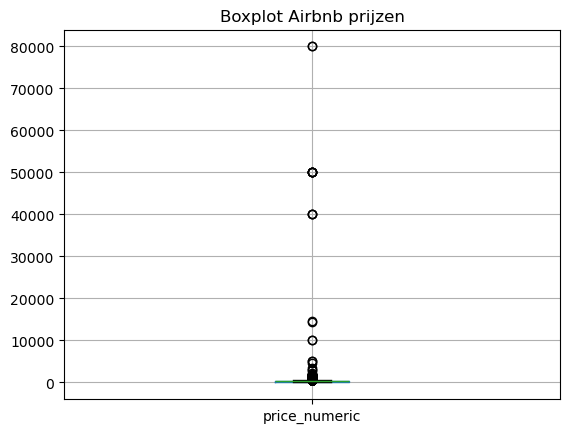

In [89]:
airbnb.boxplot(["price_numeric"])
plt.title("Boxplot Airbnb prijzen")
plt.show()

Zoals te zien is, zijn er extreme uitschieters die de data vertekenen. Het zou goed kunnen dat deze hoge prijzen verkeerd ingevuld zijn. Ik ga deze uitschieters uit data verwijderen door gebruik te maken van de IQR-methode:

In [90]:
airbnb_clean = airbnb

Q1 = airbnb_clean["price_numeric"].quantile(0.25)
Q3 = airbnb_clean["price_numeric"].quantile(0.75)
IQR = Q3 - Q1

ondergrens = Q1 - 1.5 * IQR
bovengrens = Q3 + 1.5 * IQR

airbnb_clean = airbnb_clean[(airbnb_clean["price_numeric"] >= ondergrens) & (airbnb_clean["price_numeric"] <= bovengrens)]

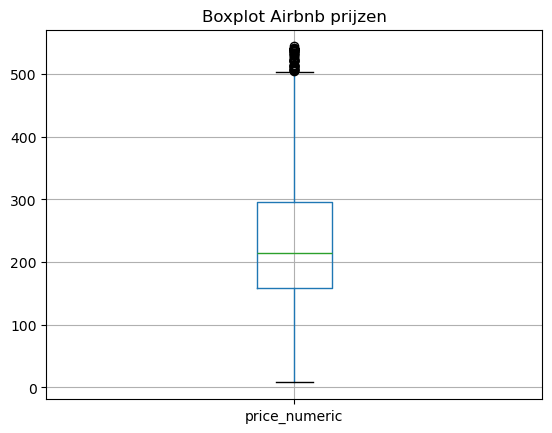

In [91]:
airbnb_clean.boxplot(["price_numeric"])
plt.title("Boxplot Airbnb prijzen")
plt.show()

Voor de 'number_of_reviews' kolom maak ik ook een boxplot:

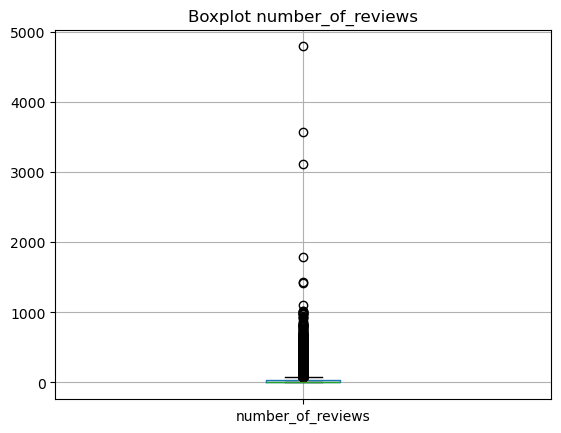

In [92]:
airbnb.boxplot(["number_of_reviews"])
plt.title("Boxplot number_of_reviews")
plt.show()

Ook hier zijn er extreme uitschieters te zien. Een mogelijke verklaring zou kunnen zijn dat de host gesjoemeld heeft, en zelf reviews heeft achtergelaten op zijn/haar airbnb. Dit is echter niet zeker. Ik kies ervoor om de uitschieters weer te verwijderen met de IQR-methode:

In [93]:
Q1 = airbnb_clean["number_of_reviews"].quantile(0.25)
Q3 = airbnb_clean["number_of_reviews"].quantile(0.75)
IQR = Q3 - Q1

ondergrens = Q1 - 1.5 * IQR
bovengrens = Q3 + 1.5 * IQR

airbnb_clean = airbnb_clean[(airbnb_clean["number_of_reviews"] >= ondergrens) & (airbnb_clean["number_of_reviews"] <= bovengrens)]

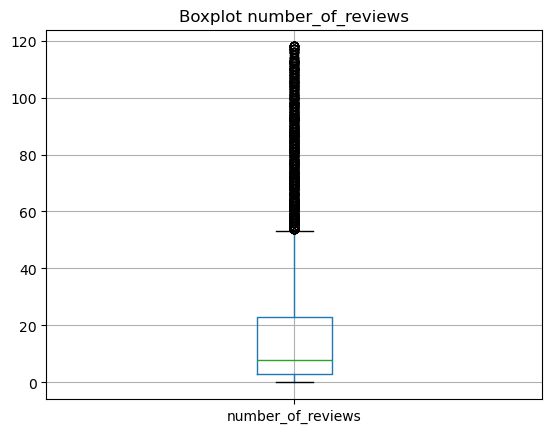

In [94]:
airbnb_clean.boxplot(["number_of_reviews"])
plt.title("Boxplot number_of_reviews")
plt.show()

Nu we de rijen met uitschieters verwijderd hebben, is het slim om nog even controleren of de neighbourhood_cleansed kolom niet te veel waarden kwijtgeraakt is:

In [95]:
airbnb_clean["neighbourhood_cleansed"].nunique()

22

In [96]:
airbnb_clean["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
De Baarsjes - Oud-West                    901
De Pijp - Rivierenbuurt                   597
Centrum-West                              527
Centrum-Oost                              424
Zuid                                      375
Westerpark                                333
Oud-Oost                                  300
Bos en Lommer                             253
Oud-Noord                                 244
Oostelijk Havengebied - Indische Buurt    228
Noord-West                                173
Watergraafsmeer                           152
Noord-Oost                                122
IJburg - Zeeburgereiland                  102
Slotervaart                                95
Geuzenveld - Slotermeer                    88
Buitenveldert - Zuidas                     71
De Aker - Nieuw Sloten                     31
Osdorp                                     27
Gaasperdam - Driemond                      27
Bijlmer-Oost                               24
Bijlmer-Cen

Ik denk dat 20 datapunten (Bijlmer-Centrum) nog steeds genoeg is om een betrouwbaar gemiddelde te krijgen. Mocht dit niet het geval zijn, dan kan ik ervoor kiezen om alleen te kijken naar wijken waar minimaal 50 of 100 airbnb's zijn.

## Visualisatie 1

Met deze barplot probeer ik te laten zien of er verschil in gemiddelde prijs zit tussen wijken:

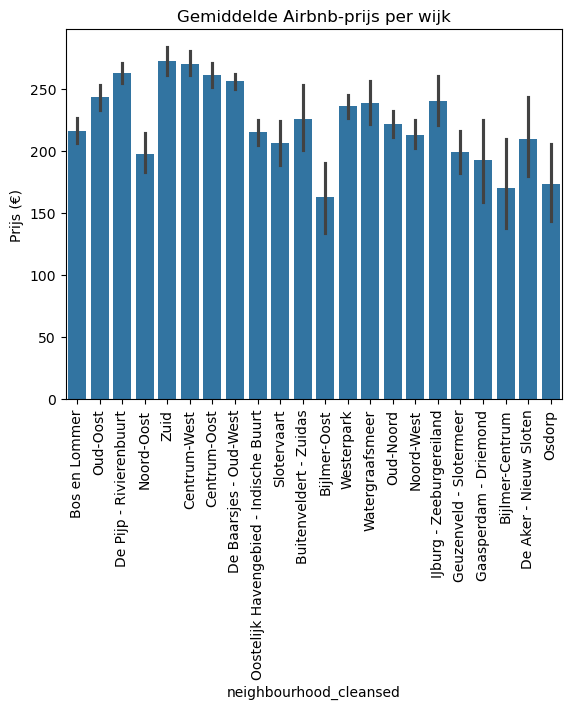

In [97]:
ax = sns.barplot(x="neighbourhood_cleansed", y="price_numeric", data=airbnb_clean)
plt.xticks(rotation=90)
plt.title("Gemiddelde Airbnb-prijs per wijk")
plt.ylabel("Prijs (€)")
plt.show()

Het valt op dat er best een grote spreiding in gemiddelde prijs zit tussen verschillende wijken. Zo kost een airbnb in de goedkoopste wijk (Bijlmer-Oost) gemiddeld rond de 160 euro per nacht, en in de duurste wijk (Zuid) ongeveer 270 euro per nacht.

**Conclusie**: De wijk waarin een airbnb staat heeft zeker invloed op de vraagprijs.

## Visualisatie 2

Met deze scatterplot probeer ik aan te tonen of er een verband is tussen het aantal reviews en de prijs van een airbnb:

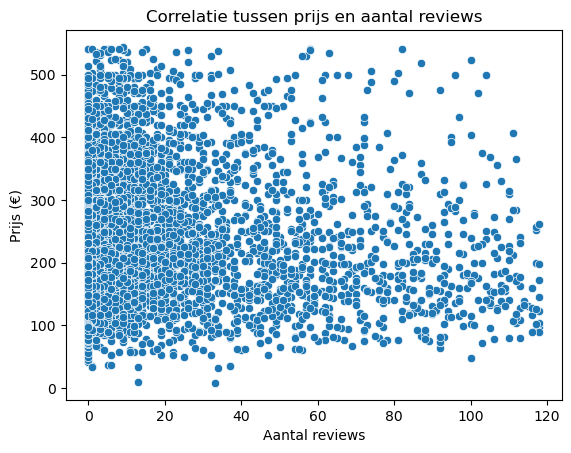

In [98]:
sns.scatterplot(x="number_of_reviews", y="price_numeric", data=airbnb_clean)
plt.xlabel("Aantal reviews")
plt.ylabel("Prijs (€)")
plt.title("Correlatie tussen prijs en aantal reviews")
plt.show()

Het valt me op dat de airbnb's met veel reviews (60+) vaak goedkoper zijn. Uit deze visualisatie valt niet te bepalen waarom dit het geval is. Het zou bijvoorbeeld kunnen komen doordat er minder airbnb's zijn met een hoge prijs, of doordat de airbnb's met een hoge prijs minder vaak bezocht worden, en dus minder reviews krijgen.

**Conclusie**: Er is geen duidelijk verband te zien tussen het aantal reviews en de prijs van een airbnb. Het lijkt erop dat een hogere prijs duidt op minder reviews, maar ik vind dat dit verband niet duidelijk genoeg is om conclusies uit te trekken.